<a href="https://colab.research.google.com/github/LauraCorredor7/Finanzas-Computacionales/blob/main/Taller_3_Laura%26Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# Librerías
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import cvxpy as cp
!pip install yfinance
import yfinance as yf
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-
2016 a Dic-2021, estime los parámetros μ y σ.

a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

St = St−1 exp{(μ– 1/2σ^2)dt + σd Wt}

Donde: Wt es un proceso estándar de Wiener. Presente gráficamente las primeras 20 trayectorias del proceso para un tiempo de un año (T=1).
b. Presente los histogramas de los precios y retornos al final del periodo (T=1).
c. Demuestre que el valor terminal del precio simulado de la acción converge a ST exp{(μ– 1/2σ2)}.

d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.

In [129]:
activos = ["T"]
precios = yf.download(activos,start="2016-01-01",end="2021-12-31")
precios = precios.loc[:,"Adj Close"].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
sigma = retornos.std()

[*********************100%***********************]  1 of 1 completed


In [130]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [131]:
T = 5
S0 = 100
NS = 10000
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)
St
#St = St["S"]

array([[100.        , 100.18443847, 100.83885469, ..., 103.12409119,
        103.13885131, 103.34166063],
       [100.        ,  99.80907578,  99.53803371, ...,  96.89192225,
         97.09213089,  97.03273674],
       [100.        ,  99.87392499,  99.60360111, ...,  97.44826226,
         97.48498843,  97.34406607],
       ...,
       [100.        ,  99.82071889,  99.64040401, ..., 100.47543385,
        100.28544489, 100.29044826],
       [100.        , 100.17034536, 100.48086614, ...,  99.49389273,
         99.56823261,  99.98724368],
       [100.        , 100.10883809,  99.92889096, ..., 101.09414337,
        101.39694374, 101.49263103]])

In [132]:
T1 = 1
S0 = 50
NS1 = 20
M1 = 252
St1 = PathsGBM(S0,mu,sigma,T1,NS1,M1)
St1

array([[50.        , 50.01419514, 50.09089803, ..., 48.9503898 ,
        48.94685446, 48.89361042],
       [50.        , 49.95071234, 49.95954546, ..., 50.9971618 ,
        51.01276944, 50.93015515],
       [50.        , 49.96292522, 49.91065131, ..., 50.68356747,
        50.69231609, 50.70165149],
       ...,
       [50.        , 49.96500419, 49.97294131, ..., 48.39508433,
        48.38048975, 48.3983689 ],
       [50.        , 50.02388352, 49.98115286, ..., 51.36516259,
        51.39493571, 51.37309327],
       [50.        , 50.08694173, 50.0757518 , ..., 50.17054476,
        50.14272249, 50.06418917]])

Text(0, 0.5, 'S(t)')

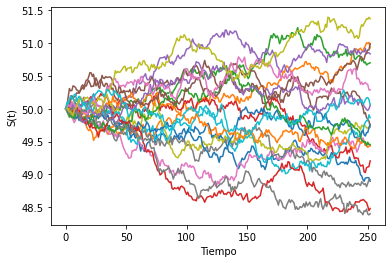

In [133]:
plt.plot(np.transpose(St1)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

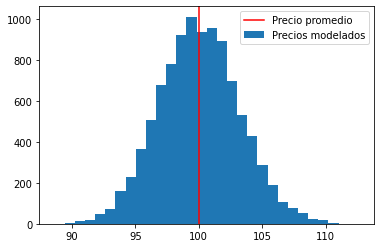

In [134]:
# Precio modelado en T
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend()

In [135]:
t_0 = 0
k = 5.5 # hacia donde va a converger
mu1 = mu
sigma = 0.3 #variabilidad del 30% 
t = np.linspace(t_0,T,M1) # time axis
dt = np.mean(np.diff(t))
y = np.zeros(M1)

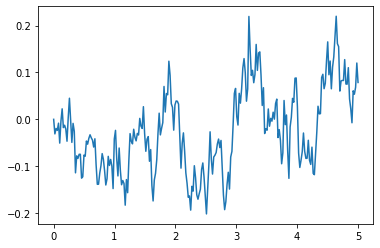

In [136]:
y0 = np.random.normal(0,1) # initial condition
drift = lambda y,t: k*(mu1-y) # define drift term, google to learn about lambda
diffusion = lambda y,t: sigma # define diffusion term

noise = np.random.normal(0,1,M1)*np.sqrt(dt) 
# solve SDE
for i in range(1,M1):
 y[i] = y[i-1] + drift(y[i-1],i*dt)*dt + diffusion(y[i-1],i*dt)*noise[i]

plt.plot(t,y);

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,1622.622312,886.275213,131.505532,inf,0.095572,1.899333e-12
norm,1637.820541,873.876704,138.254537,inf,0.095109,2.483487e-12


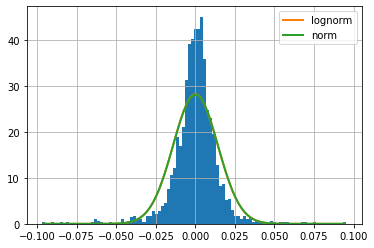

In [137]:
frp = Fitter(retornos, distributions= ['norm','lognorm'])
frp.fit()
emp_dist1 = frp.get_best(method = 'sumsquare_error')
emp_dist1
frp.summary()

2. Con las acciones de: JPM, MCD, META, WMT

a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de
pesos y sus medidas de retorno esperado y volatilidad

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
estándar o paramétrico

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de estimación histórica

d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de simulación

In [138]:
# Date range
start = '2010-12-31'
end = '2021-12-31'
# Tickers of assets
assets = ['JPM','MCD','META','WMT']
precios = yf.download(assets, start = start, end = end,interval='1Mo')['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
cov = retornos.cov()
var = np.diag(cov)
sigma = np.sqrt(var)
n = len(mu)

[*********************100%***********************]  4 of 4 completed


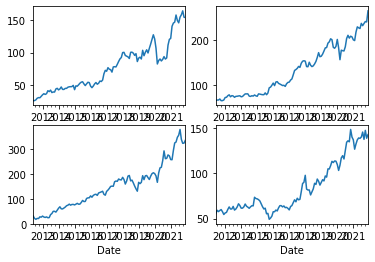

In [139]:
plt.subplot(2, 2, 1)
precios['JPM'].plot()
plt.subplot(2, 2, 2)
precios['MCD'].plot()
plt.subplot(2, 2, 3)
precios['META'].plot()
plt.subplot(2, 2, 4)
precios['WMT'].plot()
plt.show()

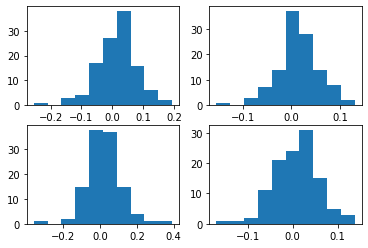

In [140]:
#Retornos
plt.subplot(2, 2, 1)
plt.hist(retornos['JPM'],bins=10)
plt.subplot(2, 2, 2)
plt.hist(retornos['MCD'],bins=10)
plt.subplot(2, 2, 3)
plt.hist(retornos['META'],bins=10)
plt.subplot(2, 2, 4)
plt.hist(retornos['WMT'],bins=10)
plt.show()

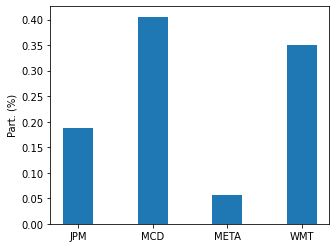

In [141]:
# Portafolio de mínima varianza global de Markowitz
def pmvg(cov, ones):  
    cov_inv = np.linalg.inv(cov)  
    w = np.dot(cov_inv, ones)  #pesos de
    return w / np.sum(w) 

unos = np.repeat(1,n)
wpmvg = pmvg(cov, unos)

fig = plt.figure(figsize = (5, 4))
plt.bar(assets, wpmvg, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

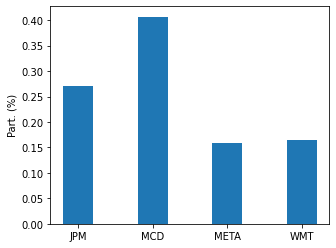

In [142]:
# Portafolio de máximo Sharpe
def pmsharpe(cov, mu, rf):  
    r = mu - rf 
    z = np.linalg.solve(cov,r) 
    return z / np.sum(z) 

rf = 0
wpt = pmsharpe(cov, mu, rf)
fig = plt.figure(figsize = (5, 4))
plt.bar(assets, wpt, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

In [143]:
wpt

array([0.26991599, 0.40681098, 0.15816363, 0.16510939])

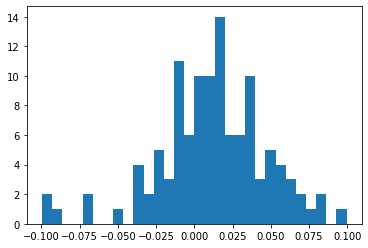

In [144]:
#VAR
w = cp.Variable(n)
risk = cp.quad_form(w,cov)
objective = cp.Minimize(risk)
constraints = [cp.sum(w)==1, w>=0]
optim = cp.Problem(objective,constraints)
optim.solve()
wpmvg = w.value
ret_port1 = retornos @ wpmvg 
plt.hist(ret_port1,bins=30)
plt.show()

In [145]:
rp1 = ret_port1.mean()
sigmap1 = ret_port1.std()


In [146]:
# Delta VaR
alpha = 0.01
VaRp = rp1 - norm.ppf(1-alpha)*sigmap1
rp1, sigmap1, VaRp

(0.01185694101217427, 0.03539023444699364, -0.07047305565539631)

In [147]:
VaRH = np.percentile(rp1,1) # 1 para el 99% de confianza
VaRH

0.01185694101217427

In [148]:
# Delta VaR
alpha = 0.05
VaRp = rp1 - norm.ppf(1-alpha)*sigmap1
rp1, sigmap1, VaRp

(0.01185694101217427, 0.03539023444699364, -0.04635481447662615)

In [149]:
VaRH = np.percentile(rp1,1) # 1 para el 99% de confianza
VaRH

0.01185694101217427

In [150]:
def random_portfolios(n_portfolios, mu, cov, rf):
    medidas = np.zeros((3,n_portfolios))
    weight_array = []
    for i in range(n_portfolios):
      weights = np.random.random(4)
      weights /= np.sum(weights)
      weight_array.append(weights)
      retorno = np.sum(mu*weights ) * 12
      std_dev = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(12)
      medidas[0,i] = std_dev
      medidas[1,i] = retorno
      # Sharpe ratio
      medidas[2,i] = (retorno - rf) / std_dev
    return medidas , weight_array

In [151]:
# Number of portfolios to simulate
n_portfolios = 10000
rf = 0.0

Returno esperado: 0.17
Volatilidad: 0.13
Portafolio de Máx. Sharpe: 

       JPM       MCD      META       WMT
0  0.28004  0.404917  0.154886  0.160157
----------------------------------------------------------------------------------------------------


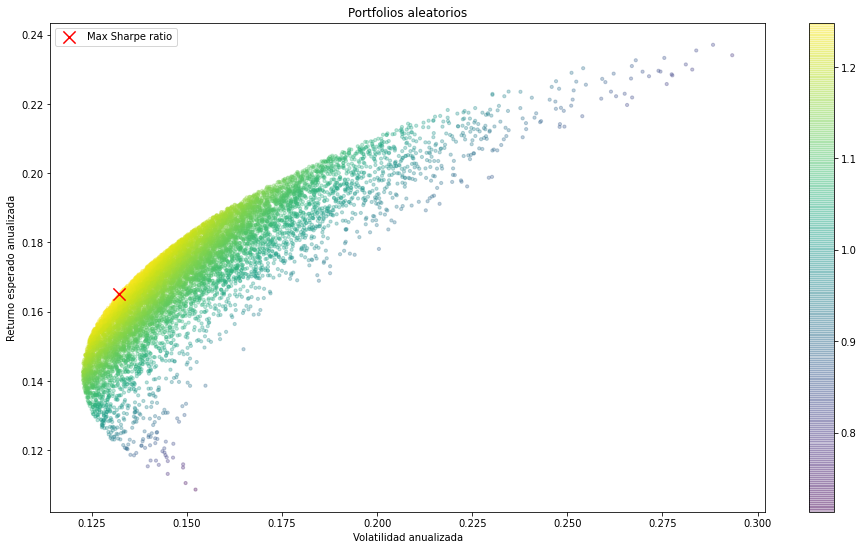

In [152]:
def display_simulated_portfolios(mu, cov, n_portfolios, rf):
    medidas, weights = random_portfolios(n_portfolios,mu, cov, rf)
    max_sharpe_idx = np.argmax(medidas[2])
    stdev_portfolio, returns_portfolio = medidas[0,max_sharpe_idx], medidas[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=precios.columns)
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    print("Returno esperado:", round(returns_portfolio,2))
    print("Volatilidad:", round(stdev_portfolio,2))

    print("Portafolio de Máx. Sharpe: \n")
    print(max_sharpe_allocation)
    print("-"*100)

    plt.figure(figsize=(16, 9))
    plt.scatter(medidas[0,:],medidas[1,:],c=medidas[2,:], marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Portfolios aleatorios')
    plt.xlabel('Volatilidad anualizada')
    plt.ylabel('Returno esperado anualizada')
    plt.legend()
    
display_simulated_portfolios(mu, cov, n_portfolios, rf)

In [153]:
t = len(retornos)
ret_sim = np.random.multivariate_normal(mu,cov,t)
mu_sim = ret_sim.mean(axis=0)
cov_sim = np.cov(ret_sim.T) 
sigma_sim = ret_sim.std(axis=0)

In [154]:
# Number of portfolios to simulate
n_portfolios = 10000
wpmvg_sim = np.zeros((n_portfolios, n))
for i in range(n_portfolios):
  ret_sim = np.random.multivariate_normal(mu,cov,t)
  cov_sim = np.cov(ret_sim.T) 
  wi = pmvg(cov_sim, unos)
  wpmvg_sim[i,:] =  wi

pesos = wpmvg_sim.mean(axis=0)/np.sum(wpmvg_sim.mean(axis=0))
pesos


array([0.18679951, 0.40509341, 0.05677284, 0.35133424])

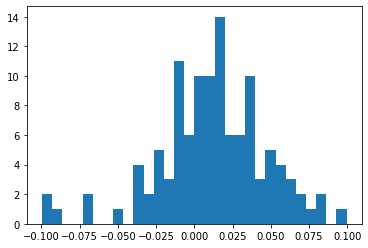

In [155]:
#VAR
w = cp.Variable(n)
risk = cp.quad_form(w,cov)
objective = cp.Minimize(risk)
constraints = [cp.sum(w)==1, w>=0]
optim = cp.Problem(objective,constraints)
optim.solve()
wpmvg = w.value
ret_port = retornos @ wpmvg 
plt.hist(ret_port,bins=30)
plt.show()

In [156]:
rp = ret_port.mean()
sigmap = ret_port.std()
rp, sigmap

(0.01185694101217427, 0.03539023444699364)

In [157]:
# Delta VaR
alpha = 0.01
VaRp = rp - norm.ppf(1-alpha)*sigmap
rp, sigmap, VaRp

(0.01185694101217427, 0.03539023444699364, -0.07047305565539631)

In [158]:
VaRH = np.percentile(ret_port,1) # 1 para el 99% de confianza
VaRH

-0.0933841965159878

In [159]:
# Delta VaR
alpha1 = 0.05
VaRp = rp - norm.ppf(1-alpha1)*sigmap
rp, sigmap, VaRp

(0.01185694101217427, 0.03539023444699364, -0.04635481447662615)

In [160]:
# VaR Historico
VaRH1 = np.percentile(ret_port,1) # 1 para el 95% de confianza
VaRH1

-0.0933841965159878

3. Con la información de los registros de pérdidas de la entidad TuDeuda Ltda:

a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría).
Apoye su análisis con gráficos (histogramas y QQplot).

b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?
c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución
recomienda?

d. Si la frecuencia de los eventos de perdidas sigue una distribución Binomial con parámetros
N=12 y p=0.2, calcule la perdida esperada.

In [161]:
# Se indexa el excel al colab
df=pd.read_excel('DataLoss.xlsx')

In [162]:
mu = df.mean()
cov = df.cov()
var = np.diag(cov)
sigma = np.sqrt(var)
retorno_loss = np.log(df['Loss']/df['Loss'].shift(1)).dropna()
mu_2 = retorno_loss.mean()
sigma_2 = retorno_loss.std()

In [163]:
df.describe()

,Loss
count,252.000000
mean,9983.123016
std,5591.237909
min,4.000000
25%,5244.250000
50%,10415.500000
75%,14336.750000
max,19948.000000


La distribución de los datos es asimétrica, tiene un promedio de los datos 9.983.

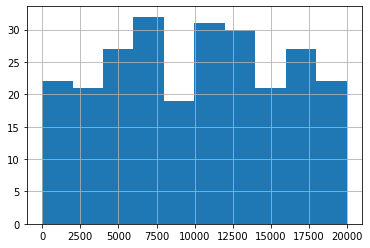

In [164]:
df['Loss'].hist()

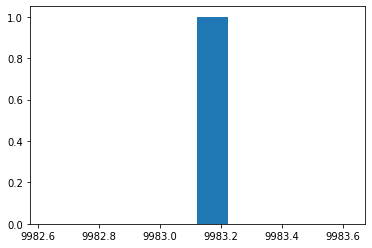

In [165]:
plt.hist(mu,bins=10)
plt.show()

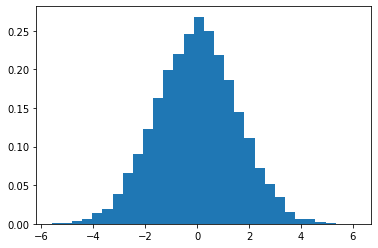

In [166]:
mu1 = mu_2
sd = sigma_2
simulations = 10000
loss = np.random.normal(mu1, sd, simulations)
plt.hist(loss,density=True,bins=30)
plt.show()
     

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]


{'lognorm': {'s': 0.01939772148455386,
  'loc': -79.28306445431983,
  'scale': 79.26782266973305}}

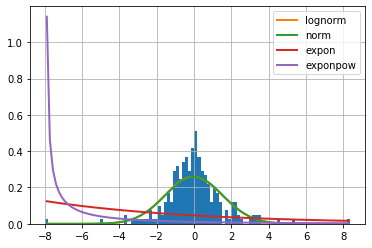

In [167]:
fa = Fitter(retorno_loss, distributions= ['norm','lognorm','expon','exponpow'])
fa.fit()
fa.summary()
emp_d = fa.get_best(method = 'sumsquare_error')
emp_d

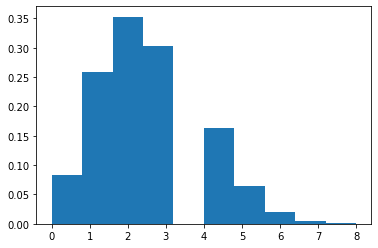

In [168]:
N=12
p=0.2
simulations = 10000
biloss = np.random.binomial(N,p,simulations)
plt.hist(biloss,density=True)
plt.show()

4. Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

a. Construya la gráfica de las series históricas de los precios y/o valores

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y
con duración T=1.


In [169]:
activos = ["MSCI"]
data = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios3 = data.loc[:,"Close"].dropna()
retornos3 = np.log(precios3/precios3.shift(1)).dropna()
mu3 = retornos.mean()
sigma3 = retornos.std()

[*********************100%***********************]  1 of 1 completed


In [170]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

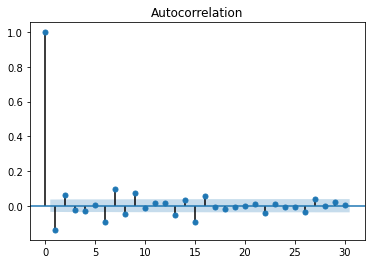

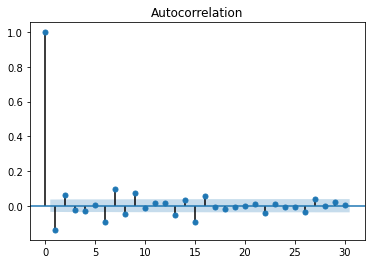

In [171]:
plot_acf(retornos3, lags=30)

In [172]:
# Test Dickey-Fuller
# Prueba 
pruebadf1 = adfuller(retornos3)  
pruebadf1

(-15.09925599235073,
 7.9843691212568e-28,
 14,
 3004,
 {'1%': -3.4325287272587293,
  '5%': -2.8625026211355227,
  '10%': -2.5672824284575735},
 -15371.160585081125)

In [173]:
activos = ["^IRX"]
data = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios4 = data.loc[:,"Adj Close"].dropna()
retornos4 = np.log(precios4/precios4.shift(1)).dropna()
mu4 = retornos.mean()
sigma4 = retornos.std()

[*********************100%***********************]  1 of 1 completed


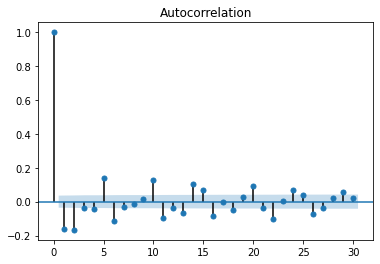

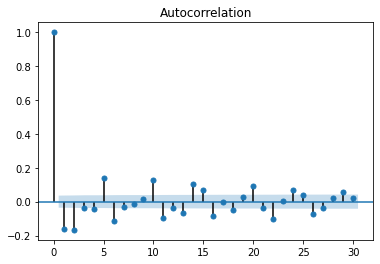

In [174]:
plot_acf(retornos4, lags=30)

In [175]:
# Test Dickey-Fuller
# Prueba 
pruebadf1 = adfuller(retornos4)  
pruebadf1

(-13.644529755597254,
 1.6291356018409265e-25,
 21,
 2992,
 {'1%': -3.432537472983712,
  '5%': -2.8625064838167327,
  '10%': -2.5672844849053806},
 1022.5855588794502)

In [176]:
def PathsGBM(S0,mu4,sigma4,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St